In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [4]:
# Given parameters
lambda_B = 1
mu_S = 5
sigma_S_squared = 1
sigma_S = np.sqrt(sigma_S_squared)
p_S = 0.8
p_B = 0.2

# Define the probability density functions
def p_g_given_B(g):
    return lambda_B * np.exp(-lambda_B * g)

def p_g_given_S(g):
    return (1 / np.sqrt(2 * np.pi * sigma_S_squared)) * np.exp(-(g - mu_S)**2 / (2 * sigma_S_squared))

# Define the function to find the threshold (where posterior probabilities are equal)
def threshold_equation(g):
    left_side = p_g_given_B(g) * p_B
    right_side = p_g_given_S(g) * p_S
    return left_side - right_side

In [5]:
# Solve for the threshold g_T
# Initial guess close to expected value
initial_guess = 2.5
g_T = fsolve(threshold_equation, initial_guess)[0]

print(f"Threshold g_T = {g_T:.4f} micrograms")

# Calculate misclassification error for Bayesienine clumps
misclassification_error_B = np.exp(-g_T)
print(f"Misclassification error for Bayesienine as Statistiene: {misclassification_error_B:.4f} or {misclassification_error_B*100:.2f}%")

# Create a plot showing both distributions and the threshold
g_range = np.linspace(0, 10, 1000)
bayesienine_pdf = p_g_given_B(g_range)
statistiene_pdf = p_g_given_S(g_range)

Threshold g_T = 2.5453 micrograms
Misclassification error for Bayesienine as Statistiene: 0.0784 or 7.84%


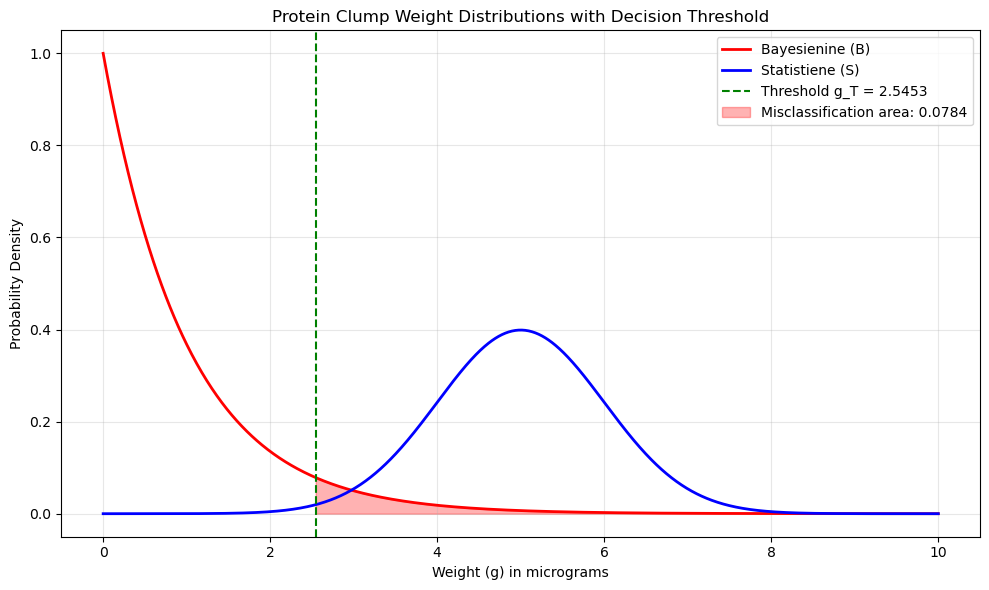

Analytical solution for threshold range: 2.4820 < g < 9.5180
Our threshold g_T = 2.4820 micrograms


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(g_range, bayesienine_pdf, 'r-', linewidth=2, label='Bayesienine (B)')
plt.plot(g_range, statistiene_pdf, 'b-', linewidth=2, label='Statistiene (S)')

# Highlight the threshold
plt.axvline(x=g_T, color='g', linestyle='--', label=f'Threshold g_T = {g_T:.4f}')

# Shade the area of misclassification for Bayesienine clumps
g_shade = np.linspace(g_T, 10, 200)
plt.fill_between(g_shade, p_g_given_B(g_shade), alpha=0.3, color='r',
                 label=f'Misclassification area: {misclassification_error_B:.4f}')

plt.xlabel('Weight (g) in micrograms')
plt.ylabel('Probability Density')
plt.title('Protein Clump Weight Distributions with Decision Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('protein_distribution_threshold.png', dpi=300)
plt.show()

# Alternative analytical solution using quadratic formula
# From the derivation: g^2 - 12g + 23.624 = 0
a = 1
b = -12
c = 23.624

# Calculate roots using the quadratic formula
discriminant = b**2 - 4*a*c
roots = [(-b - np.sqrt(discriminant))/(2*a), (-b + np.sqrt(discriminant))/(2*a)]
print(f"Analytical solution for threshold range: {roots[0]:.4f} < g < {roots[1]:.4f}")
print(f"Our threshold g_T = {roots[0]:.4f} micrograms")